# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [1]:
import os

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [2]:
import pandas as pd

In [3]:
train_tsv = pd.read_table("train.tsv")

In [4]:
train_tsv

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [5]:
test_tsv = pd.read_table("test.tsv")

In [6]:
test_tsv

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [7]:
train_tsv.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

<AxesSubplot:>

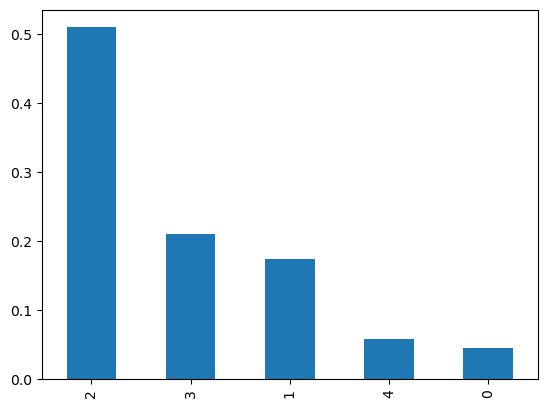

In [8]:
train_tsv.Sentiment.value_counts(normalize=True).plot(kind="bar")

In [9]:
train_tsv.Sentiment.value_counts(normalize=True)

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

In [10]:
train_tsv.Phrase.apply(len)

0         188
1          77
2           8
3           1
4           6
         ... 
156055      9
156056     25
156057     18
156058      9
156059      8
Name: Phrase, Length: 156060, dtype: int64

Summarize your insights and learnings from the dataset below:

* Class Imbalance
* 2    0.509945<br>
  3    0.210989<br>
  1    0.174760<br>
  4    0.058990<br>
  0    0.045316<br>
* Variable Phrase length 1-283

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [11]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Windows
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
q = train_tsv.Phrase.values[0]

In [13]:
q

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [14]:
word_tokenize(q)

['A',
 'series',
 'of',
 'escapades',
 'demonstrating',
 'the',
 'adage',
 'that',
 'what',
 'is',
 'good',
 'for',
 'the',
 'goose',
 'is',
 'also',
 'good',
 'for',
 'the',
 'gander',
 ',',
 'some',
 'of',
 'which',
 'occasionally',
 'amuses',
 'but',
 'none',
 'of',
 'which',
 'amounts',
 'to',
 'much',
 'of',
 'a',
 'story',
 '.']

In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
all_stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Windows
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
", ".join(all_stop_words)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [17]:
all_stop_words.index("about")

76

In [18]:
accepted_stop_words = all_stop_words[:76]

In [19]:
", ".join(accepted_stop_words)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with"

In [20]:
def tokenize(text):
    return [tokens.lower() for tokens in word_tokenize(text) if tokens.isalpha()]

In [21]:
tokenize(q)

['a',
 'series',
 'of',
 'escapades',
 'demonstrating',
 'the',
 'adage',
 'that',
 'what',
 'is',
 'good',
 'for',
 'the',
 'goose',
 'is',
 'also',
 'good',
 'for',
 'the',
 'gander',
 'some',
 'of',
 'which',
 'occasionally',
 'amuses',
 'but',
 'none',
 'of',
 'which',
 'amounts',
 'to',
 'much',
 'of',
 'a',
 'story']

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
vectorizer = TfidfVectorizer(lowercase=True,
                             tokenizer = tokenize,
                             stop_words = accepted_stop_words,
                             ngram_range=(1,2),
                             max_features=5000)

In [24]:
%%time
inputs = vectorizer.fit_transform(train_tsv.Phrase)

CPU times: total: 15.6 s
Wall time: 15.6 s


In [25]:
inputs.shape

(156060, 5000)

In [26]:
inputs[5].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [27]:
test_inputs = vectorizer.transform(test_tsv.Phrase)

In [28]:
test_inputs.shape

(66292, 5000)

In [30]:
submission = pd.read_csv("sampleSubmission.csv")

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [31]:
inputs.shape

(156060, 5000)

In [32]:
test_inputs.shape

(66292, 5000)

In [33]:
vectorizer.get_feature_names_out()[:100]

array(['abandon', 'ability', 'ability to', 'able', 'able to', 'about',
       'about characters', 'about film', 'about growing', 'about how',
       'about movie', 'about nothing', 'about one', 'about something',
       'about two', 'above', 'absolute', 'absolutely', 'absorbing',
       'abstract', 'absurd', 'absurdity', 'abuse', 'academy', 'accent',
       'accents', 'accept', 'acceptable', 'access', 'accessible',
       'accomplished', 'account', 'accurate', 'ache', 'achievement',
       'achieves', 'achingly', 'across', 'act', 'acted', 'acting',
       'action', 'action film', 'action films', 'action flick',
       'action hero', 'action movie', 'action sequences', 'actions',
       'actor', 'actors', 'actors in', 'actress', 'actresses', 'acts',
       'actual', 'actually', 'ad', 'adam', 'adam sandler', 'adams',
       'adaptation', 'adapted', 'add', 'add up', 'added', 'addition',
       'addition to', 'adds', 'adequate', 'admirable', 'admire', 'admit',
       'admittedly', 'adolesc

In [34]:
train_tsv.Phrase.values[0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [35]:
import numpy as np

In [36]:
index = np.where(vectorizer.get_feature_names_out()=="series")

In [37]:
index

(array([3777], dtype=int64),)

In [38]:
len(inputs[0].toarray()[0])

5000

In [39]:
inputs[0].toarray()[0][3777]

0.2563566715983266

In [40]:
vectorizer.get_feature_names_out()[3777]

'series'

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)
<div>
Because then training and Validation dataset will not be guaranteed to be independent, and we wont get clear picture of the model</div>

In [41]:
inputs.shape

(156060, 5000)

In [42]:
Training_sample_size = 114_500

In [43]:
X_train = inputs[:Training_sample_size]
y_train = train_tsv.Sentiment.values[:Training_sample_size]
X_train.shape, y_train.shape

((114500, 5000), (114500,))

In [44]:
X_val = inputs[Training_sample_size:]
y_val = train_tsv.Sentiment.values[Training_sample_size:]
X_val.shape, y_val.shape

((41560, 5000), (41560,))

In [45]:
X_train[5]

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [46]:
y_train[5]

2

### Train Logistic Regression Model



In [47]:
# from sklearn.linear_model import L/ogisticRegression

In [48]:
# lreg = LogisticRegression(solver="saga", 
#                           class_weight = "balanced",
#                           max_iter = 20000)

In [49]:
# %%time
# lreg.fit(X_train,y_train)

In [50]:
# y_hat = lreg.predict(X_val)

In [51]:
from sklearn.metrics import accuracy_score
# accuracy_score(y_val, y_hat)

In [52]:
# prediction = lreg.predict(X_train)

### Study Predictions on Sample Inputs

In [53]:
# train_tsv.Phrase.values[:10]

In [54]:
# prediction[:10]

In [55]:
# y_train[:10]

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score 



In [56]:
# sentiment_prediction = lreg.predict(test_inputs)

In [57]:
# submission.Sentiment = sentiment_prediction

In [58]:
# submission.to_csv("submission.csv", index=None)

## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional: 
* Use PCA for dimensionality reduction
* Compare classification vs regression models



### Model 1

In [59]:
# from sklearn import tree
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train,y_train)

In [60]:
# from sklearn.metrics import accuracy_score
# y_hat = clf.predict(X_val)
# accuracy_score(y_val, y_hat)

In [61]:
# prediction = clf.predict(X_train)
# accuracy_score(y_train, prediction)

In [62]:
# sentiment_prediction = clf.predict(test_inputs)
# submission.Sentiment = sentiment_prediction
# submission.to_csv("submission.csv", index=None)

### Model 2

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
# forest_classi = RandomForestClassifier(2000,
#                                       n_jobs=-1,
#                                        class_weight="balanced"
#                                       )


In [65]:
# %%time
# forest_classi.fit(X_train,y_train)

In [66]:
# prediction_forest_train = forest_classi.predict(X_train)
# accuracy_score(y_train, prediction_forest_train)

In [67]:
from sklearn.metrics import accuracy_score
# y_hat = forest_classi.predict(X_val)
# accuracy_score(y_val, y_hat)

In [68]:
# sentiment_prediction = forest_classi.predict(test_inputs)
# submission.Sentiment = sentiment_prediction
# submission.to_csv("submission.csv", index=None)

### Model 3

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(1000,
                                  max_features="log2")
forest_reg.fit(X_train,y_train)

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
prediction_forest_reg_train = forest_reg.predict(X_train)
prediction_forest_reg_train = np.round_(prediction_forest_reg_train.astype(int))
accuracy_score(y_train, prediction_forest_reg_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_hat = forest_reg.predict(X_val)
y_hat = np.round_(y_hat.astype(int))
accuracy_score(y_val, y_hat)

In [ ]:
sentiment_prediction = forest_reg.predict(test_inputs)
sentiment_prediction = np.round_(sentiment_prediction.astype(int))
submission.Sentiment = sentiment_prediction
#submission.to_csv("submission.csv", index=None)